这个例子展示了如何使用scikit-learn 识别手写数字

In [66]:
# 导入相关的库
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split

加载数据源，显示基本数据的样本

[0 1 2 ... 8 9 8]


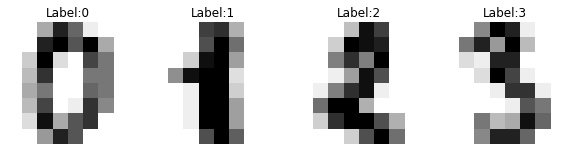

In [67]:
digits=datasets.load_digits()
# print(digits)
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
# print(digits.images)
print(digits.target)
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label:{label}")
    pass
# for 

然后吧数据集拆分成训练集、测试集

In [68]:
digits.images.shape
len(digits.images)
data=digits.images.reshape((len(digits.images),-1))
print(data)
# 创建svm分类器
clf=svm.SVC()
# 拆分数据集
X_train,X_test,y_train,y_test=train_test_split(data,digits.target,test_size=0.5,shuffle=False)
# 在svm分类器中学习
clf.fit(X_train,y_train)
# 训练完成开始预测,结果为预测的样本标签
predicted =clf.predict(X_test)
print(predicted)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[8 8 4 9 0 8 9 1 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 9 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 9 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 5 4 6 3 1 7 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 5 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 8 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 9 2 3 4 5 6 7 8 9

接下来对预测结果进行分析，看看效果怎么样,先显示测试集的前四个样本，看看是与预设的样本标签符合


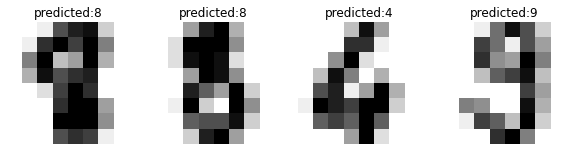

In [69]:
fig,axes=plt.subplots(1,4,figsize=(10,3))
for ax,image,predict in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image=image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"predicted:{predict}")
    pass

输出分类器的指标数据

In [70]:
print(clf)
# print(metrics.classification_report(y_test,y_pred=predicted))
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

SVC()
Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.97      0.97      0.97        91
           2       1.00      0.98      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.95      0.99      0.97        89
           8       0.92      0.95      0.94        88
           9       0.92      0.96      0.94        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899


